In [1]:
import pandas as pd
import numpy as np 


In [2]:
df1= pd.read_csv("cln3_tn.movie_budgets.csv")
df1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
0,0,0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,1,1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,2,2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,3,3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,4,4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636
...,...,...,...,...,...,...,...,...,...,...,...
5227,5228,5775,5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,923.485714
5228,5229,5776,5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-87.142857
5229,5230,5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,3908.250000
5230,5231,5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-73.240000


In [3]:
df2= pd.read_csv('data/cln_imdb_title_basics.csv')
df2.head()

,Unnamed: 0,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,90.0,"Comedy,Drama"
4,4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df1 = df1.set_index("movie")


In [5]:
df2 = df2.set_index('primary_title')


In [6]:
print(df2.isnull().sum())

Unnamed: 0         0
idx                0
tconst             0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [7]:
df2.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df1.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)

In [9]:
df3=df2.join(df1,on = "primary_title", how= "inner")
df3

,idx,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
primary_title,,,,,,,,,,,,,,
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135
The Overnight,40,tt0326592,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
The Overnight,67603,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
On the Road,48,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792
On the Road,39490,tt2404548,On the Road,2011,90.0,Drama,2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Blue Bird,143930,tt9607270,The Blue Bird,2015,84.0,Drama,5170,71,"Jan 1, 1976",1200000,887000,887000,-313000,-26.083333
Fuel,144552,tt9678962,Fuel,2018,90.0,"Documentary,Sport",4834,35,"Nov 14, 2008",2500000,174255,174255,-2325745,-93.029800
Diner,144854,tt9729206,Diner,2019,90.0,Crime,4310,11,"Apr 2, 1982",5000000,12592907,12592907,7592907,151.858140


In [10]:
df3.sort_values("profit_as_percentage", ascending = False).head(25)

,idx,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
primary_title,,,,,,,,,,,,,,
The Gallows,35625,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",5679,80,"Jul 10, 2015",100000,22764410,41656474,41556474,41556.474000
Bambi,44996,tt2668120,Bambi,2013,58.0,"Biography,Documentary",5346,47,"Aug 13, 1942",858000,102797000,268000000,267142000,31135.431235
Night of the Living Dead,58191,tt3393372,Night of the Living Dead,2014,79.0,Horror,5676,77,"Oct 1, 1968",114000,12087064,30087064,29973064,26292.161404
Rocky,51953,tt3080284,Rocky,2013,136.0,"Action,Comedy,Drama",5210,11,"Nov 21, 1976",1000000,117235147,225000000,224000000,22400.000000
Rocky,142843,tt9430578,Rocky,2019,90.0,"Action,Drama,Romance",5210,11,"Nov 21, 1976",1000000,117235147,225000000,224000000,22400.000000
Halloween,8337,tt1502407,Halloween,2018,106.0,"Horror,Thriller",5536,37,"Oct 17, 1978",325000,47000000,70000000,69675000,21438.461538
Snow White and the Seven Dwarfs,127559,tt7821084,Snow White and the Seven Dwarfs,2017,49.0,"Animation,Family",5117,18,"Dec 21, 1937",1488000,184925486,184925486,183437486,12327.788038
Snow White and the Seven Dwarfs,144648,tt9691476,Snow White and the Seven Dwarfs,2016,90.0,"Comedy,Drama,Fantasy",5117,18,"Dec 21, 1937",1488000,184925486,184925486,183437486,12327.788038
The Devil Inside,9487,tt1560985,The Devil Inside,2012,83.0,Horror,5211,12,"Jan 6, 2012",1000000,53262945,101759490,100759490,10075.949000


In [11]:
profit_as_percentage = df3["profit_as_percentage"]

In [13]:
profit = df3['profit']

In [14]:
runtime_minutes = df3["runtime_minutes"]

In [15]:
correlation = profit_as_percentage.corr(runtime_minutes)
print(correlation)

-0.058269353667834825


# No correlation between profit % and Runtime 

In [16]:
correlation = runtime_minutes.corr(profit)
print(correlation)

0.1313483692662205


In [17]:
df4 = df3.groupby ("genres")["profit_as_percentage"].mean()
df4

genres
Action                        167.547170
Action,Adventure              358.139374
Action,Adventure,Animation    310.098117
Action,Adventure,Biography    147.584996
Action,Adventure,Comedy       301.540550
                                 ...    
Sci-Fi,Thriller               312.259323
Sport                         -35.016841
Thriller                      318.876397
War                           230.013121
Western                        46.501758
Name: profit_as_percentage, Length: 326, dtype: float64

In [18]:
df4.sort_values( ascending = False).head(10)


genres
Animation,Family           12327.788038
Drama,Family,Fantasy        4726.022386
Action,History,War          4527.777529
Animation,Documentary       3366.441499
Action,Comedy,Drama         3333.782461
Comedy,Drama,Fantasy        3195.555800
Biography,Documentary       2701.134322
Horror,Romance,Thriller     2617.924114
Musical                     2471.196918
Action,Drama,Romance        2367.289443
Name: profit_as_percentage, dtype: float64

In [19]:
df3["unique_genres"] = df3["genres"].map(lambda x: x.split(','))
df3

,idx,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage,unique_genres
primary_title,,,,,,,,,,,,,,,
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,"[Action, Adventure, Fantasy]"
The Overnight,40,tt0326592,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,[None]
The Overnight,67603,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,"[Comedy, Mystery]"
On the Road,48,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792,"[Adventure, Drama, Romance]"
On the Road,39490,tt2404548,On the Road,2011,90.0,Drama,2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Blue Bird,143930,tt9607270,The Blue Bird,2015,84.0,Drama,5170,71,"Jan 1, 1976",1200000,887000,887000,-313000,-26.083333,[Drama]
Fuel,144552,tt9678962,Fuel,2018,90.0,"Documentary,Sport",4834,35,"Nov 14, 2008",2500000,174255,174255,-2325745,-93.029800,"[Documentary, Sport]"
Diner,144854,tt9729206,Diner,2019,90.0,Crime,4310,11,"Apr 2, 1982",5000000,12592907,12592907,7592907,151.858140,[Crime]


In [20]:
df3 = df3.explode("unique_genres")
    
df3.head()

,idx,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage,unique_genres
primary_title,,,,,,,,,,,,,,,
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,Action
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,Adventure
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,Fantasy
The Overnight,40,tt0326592,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,None
The Overnight,67603,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,Comedy


In [21]:
df3 = df3.loc[df3["unique_genres"] != "None"]

In [22]:
df4 = df3.groupby ("unique_genres")["profit_as_percentage"].median()
df4.sort_values(inplace = True)
df4

unique_genres
Western         -6.503600
News            35.849094
Sport           37.359138
War             38.021009
Crime           53.753771
Documentary     55.890618
History         58.119927
Drama           61.102523
Biography       74.016666
Thriller        82.050733
Action         109.847075
Romance        114.819901
Family         116.706643
Comedy         119.199703
Fantasy        126.830094
Music          128.700183
Sci-Fi         145.944250
Mystery        147.566740
Adventure      161.124261
Horror         162.551316
Animation      199.854564
Musical        323.950800
Name: profit_as_percentage, dtype: float64

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [24]:
sns.set_theme()

In [25]:
df3 = df3.loc[df3["unique_genres"] != "None"]

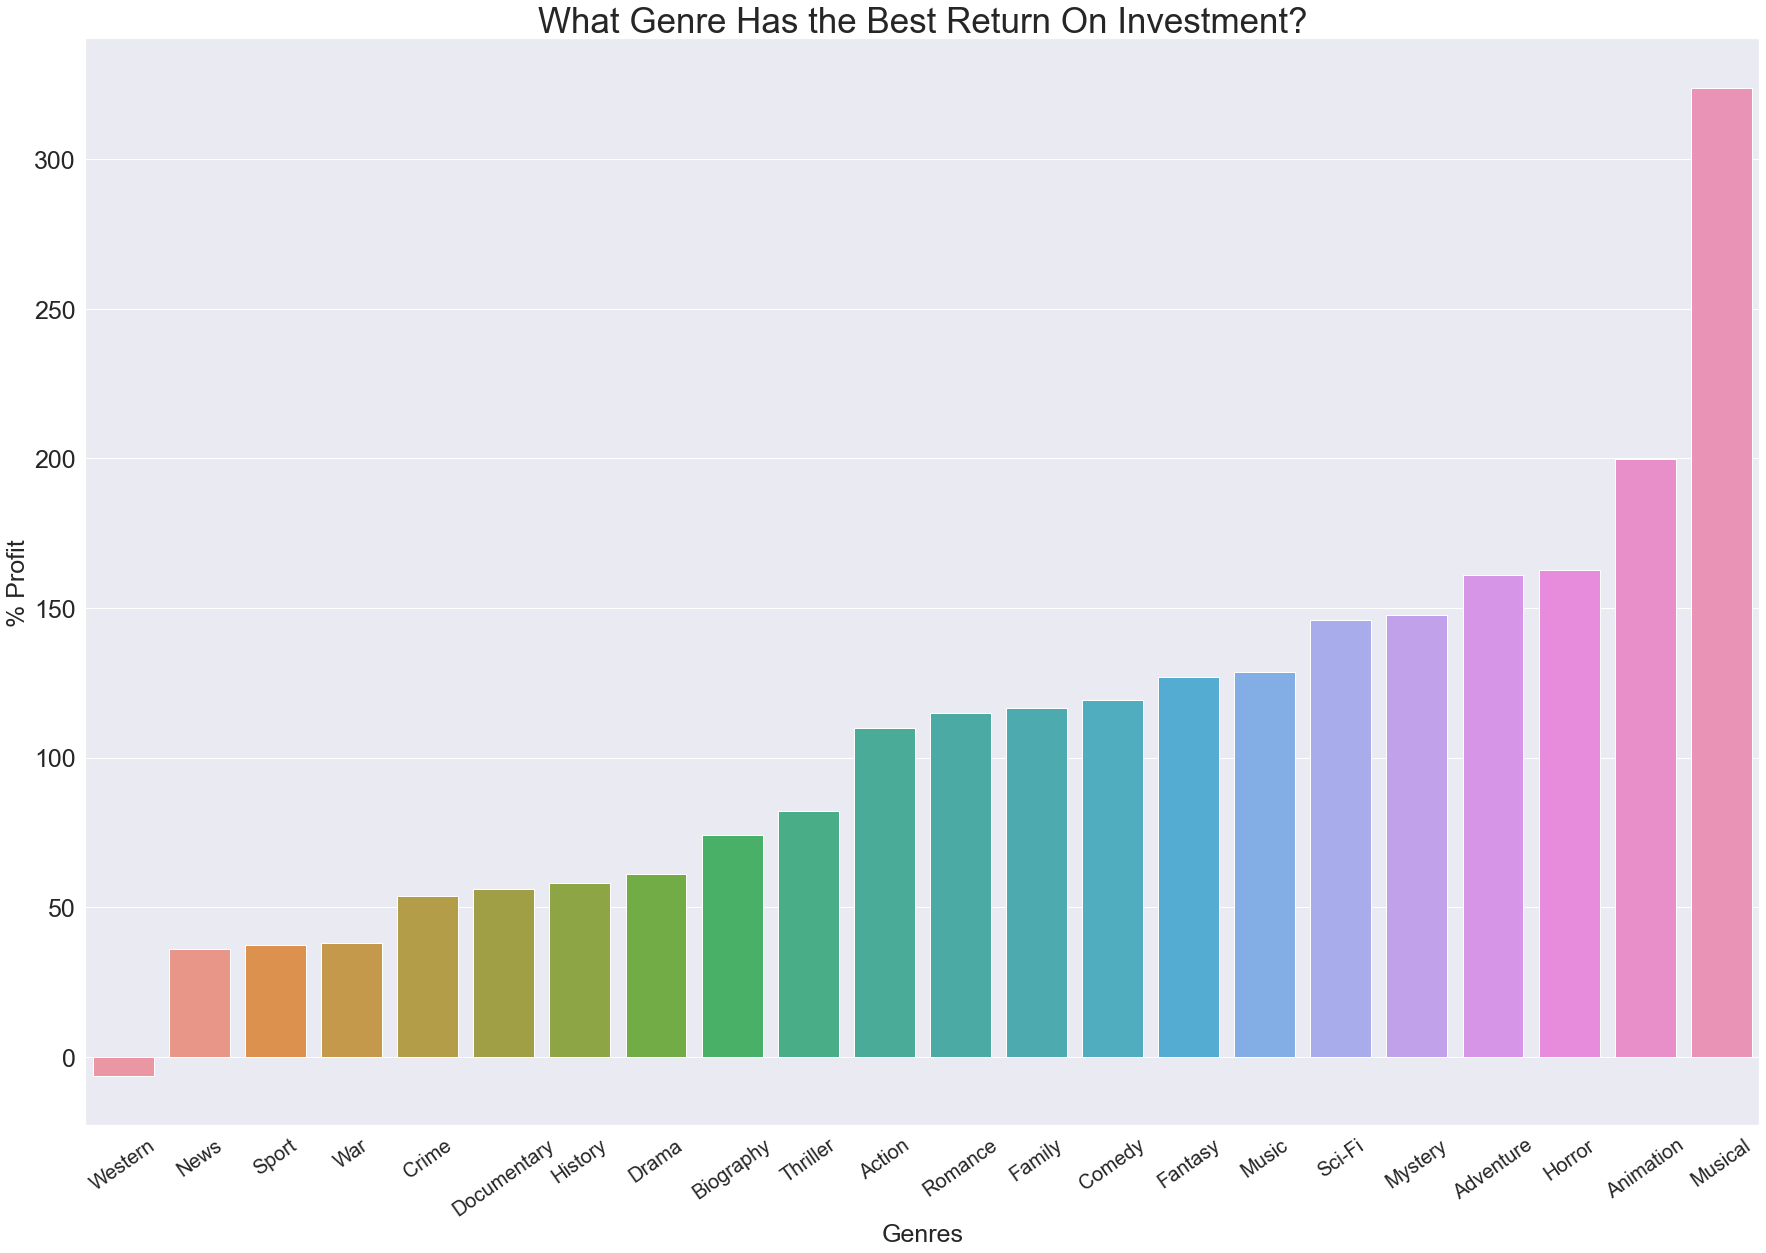

In [31]:
fig, ax =plt.subplots(figsize = (30,20))
ax = sns.barplot(x=df4.index, y=df4.values)
plt.title("What Genre Has the Best Return On Investment?", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Genres", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.set_xticklabels(list(df4.index), fontsize = 20, rotation = 35);
plt.savefig('images/Genre_return_on_investment')


# Musicals and Animation movies have the highest % return on investment

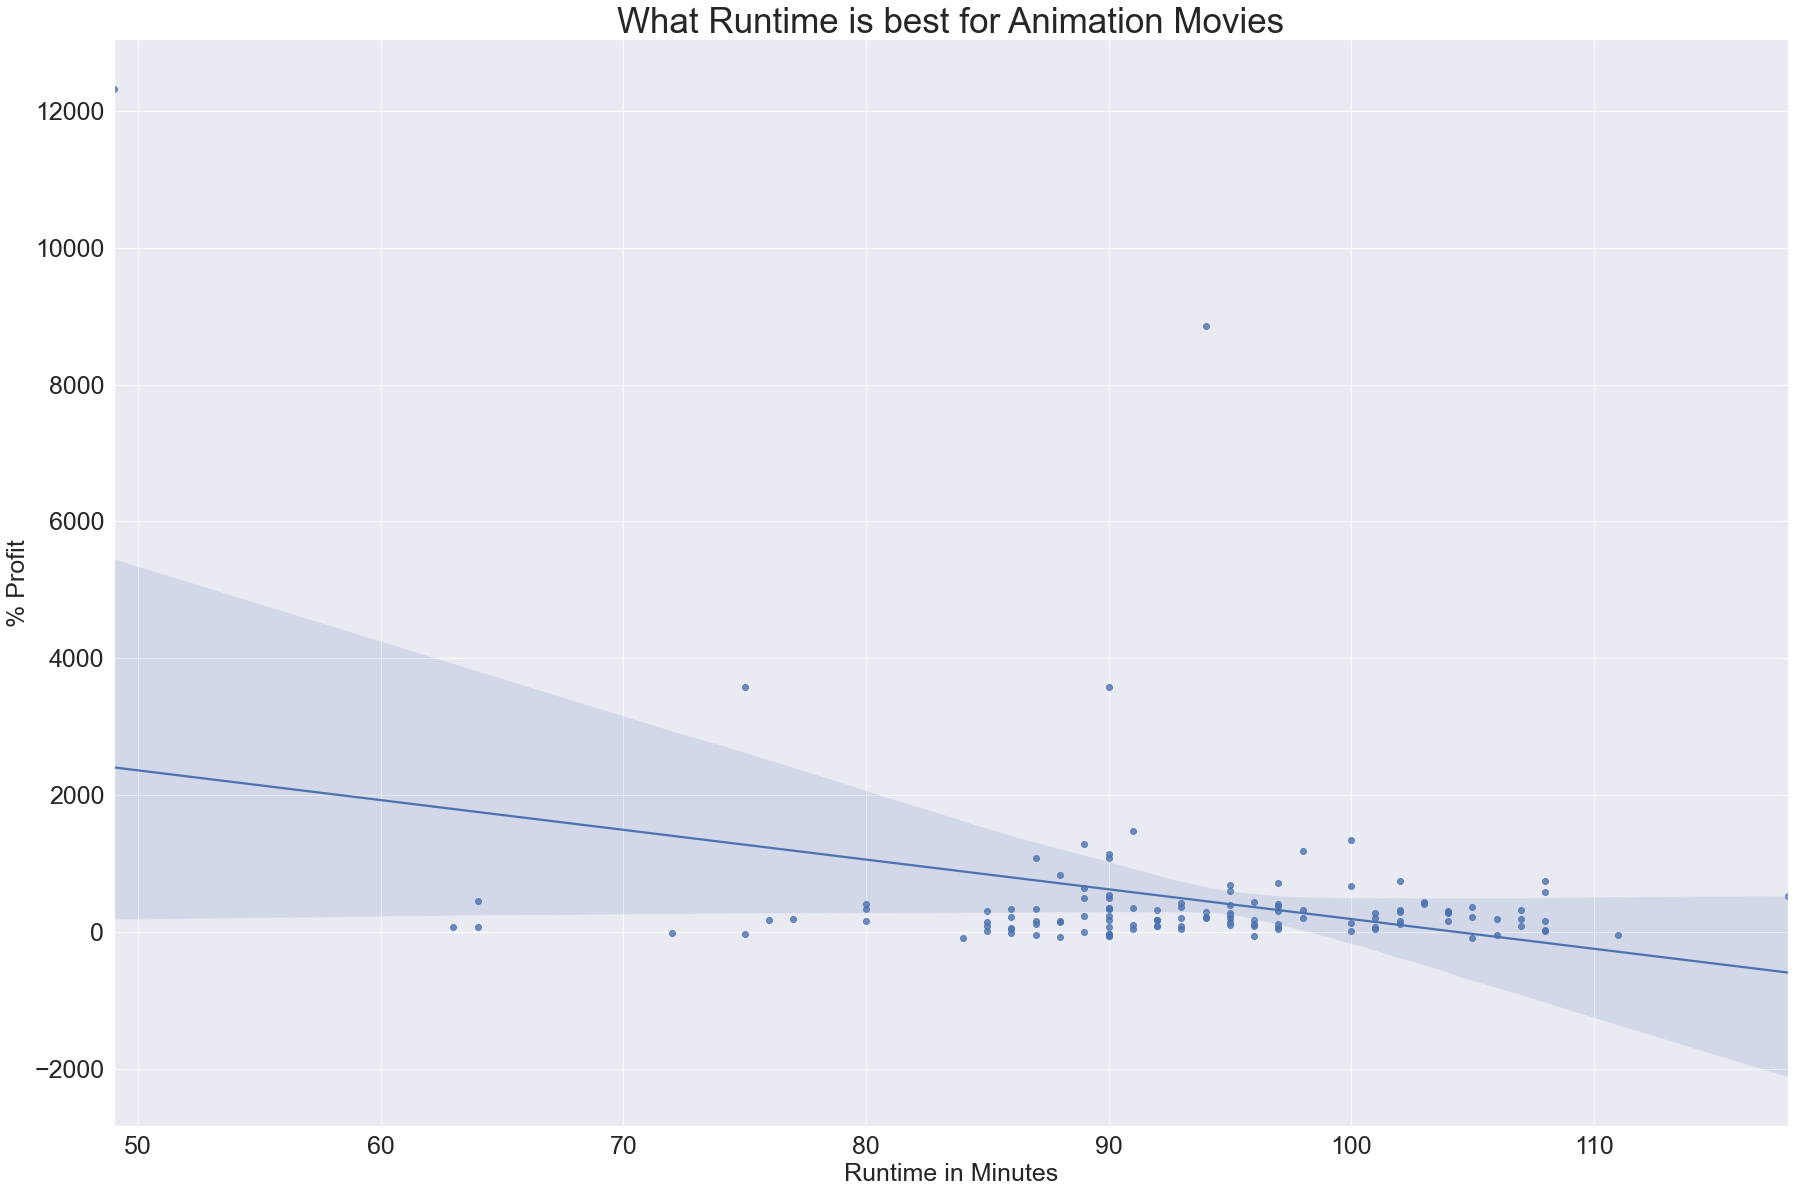

In [32]:
fig, ax = plt.subplots(figsize = (30,20))
df3_filtered = df3.loc[(df3['profit_as_percentage'] <= 15000) & (df3['runtime_minutes'] >= 45) & (df3['unique_genres'] == 'Animation')]
ax = sns.regplot(x = 'runtime_minutes', y = 'profit_as_percentage', data = df3_filtered)
plt.title("What Runtime is best for Animation Movies", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Runtime in Minutes", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.tick_params(axis = 'x', labelsize = 25)
plt.savefig('images/animation_runtime')

# Best runtime for animated movies is around the 90 minute mark

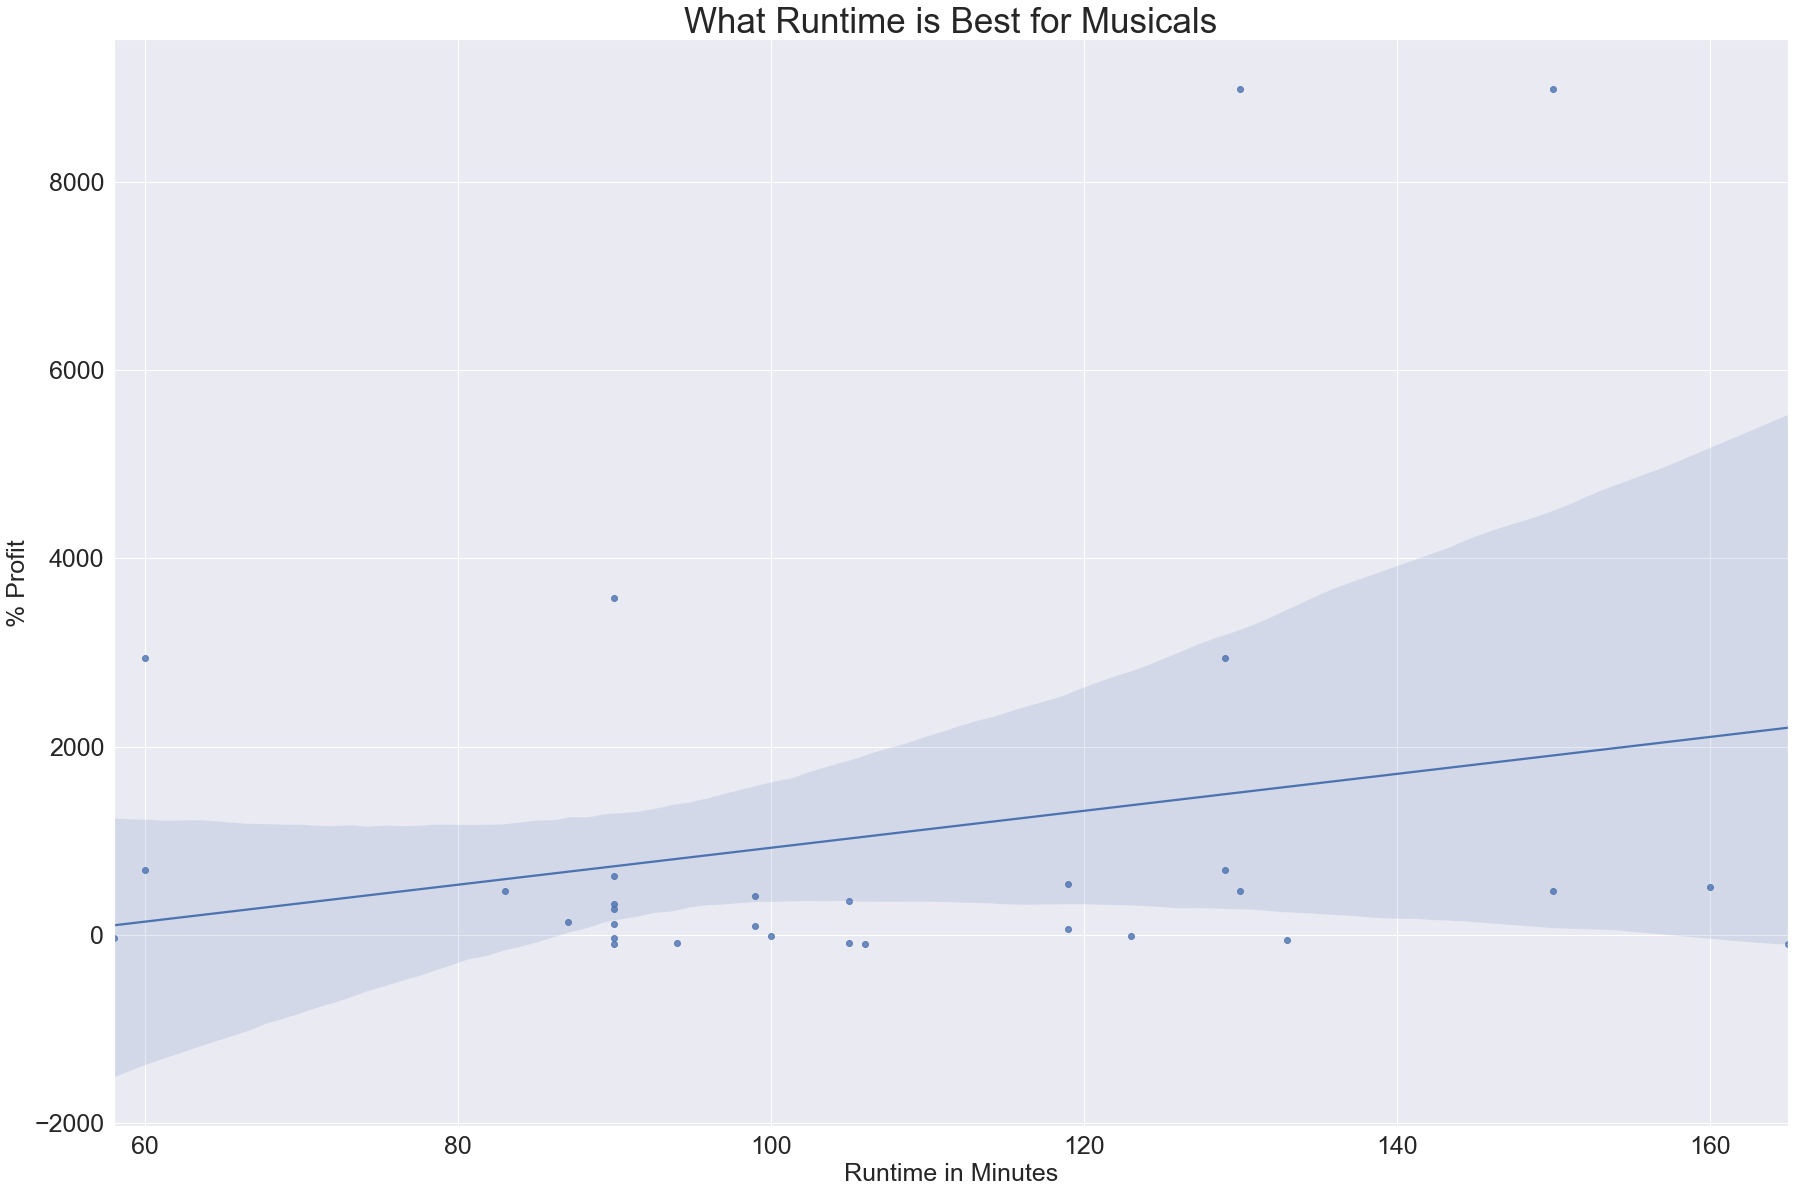

In [33]:
fig, ax = plt.subplots(figsize = (30,20))
df3_filtered = df3.loc[(df3['profit_as_percentage'] <= 15000) & (df3['runtime_minutes'] >= 45) & (df3['unique_genres'] == 'Musical')]
ax = sns.regplot(x = 'runtime_minutes', y = 'profit_as_percentage', data = df3_filtered)
plt.title("What Runtime is Best for Musicals", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Runtime in Minutes", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.tick_params(axis = 'x', labelsize = 25)
plt.savefig('images/musical_runtime')

# The best runtime for musicals is around 130 mark

In [29]:
df3.loc[df3['unique_genres'] == 'Musical', 'runtime_minutes'].median()

100.0